In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
#warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
import missingno as msno
from library.sb_utils import save_file
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [96]:
json_df = pd.read_json('logins.json')

In [97]:
json_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [98]:
json_df.columns

Index(['login_time'], dtype='object')

In [99]:
json_df['date'] = [dt.date() for dt in json_df['login_time']]
json_df['time'] = [t.time() for t in json_df['login_time']]

In [100]:
json_df.head()

,login_time,date,time
0,1970-01-01 20:13:18,1970-01-01,20:13:18
1,1970-01-01 20:16:10,1970-01-01,20:16:10
2,1970-01-01 20:16:37,1970-01-01,20:16:37
3,1970-01-01 20:16:36,1970-01-01,20:16:36
4,1970-01-01 20:26:21,1970-01-01,20:26:21


In [101]:
# json_df = json_df.drop(['login_time'], axis = 1)

In [102]:
json_df.columns

Index(['login_time', 'date', 'time'], dtype='object')

In [103]:
json_df.isnull().sum()

login_time    0
date          0
time          0
dtype: int64

In [104]:
agg_json_df = pd.DataFrame(json_df.groupby([pd.Grouper(key='login_time', freq='15Min')]).count()).reset_index()

In [105]:
daily = pd.DataFrame(json_df.groupby([pd.Grouper(key='login_time', freq='d')]).count()).reset_index()

In [106]:
daily.head()

,login_time,date,time
0,1970-01-01,112,112
1,1970-01-02,681,681
2,1970-01-03,793,793
3,1970-01-04,788,788
4,1970-01-05,459,459


In [107]:
agg_json_df.head()

,login_time,date,time
0,1970-01-01 20:00:00,2,2
1,1970-01-01 20:15:00,6,6
2,1970-01-01 20:30:00,9,9
3,1970-01-01 20:45:00,7,7
4,1970-01-01 21:00:00,1,1


In [108]:
json_df.head()

,login_time,date,time
0,1970-01-01 20:13:18,1970-01-01,20:13:18
1,1970-01-01 20:16:10,1970-01-01,20:16:10
2,1970-01-01 20:16:37,1970-01-01,20:16:37
3,1970-01-01 20:16:36,1970-01-01,20:16:36
4,1970-01-01 20:26:21,1970-01-01,20:26:21


In [109]:
agg_json_df = agg_json_df.drop(['time'], axis = 1)

In [110]:
daily =  daily.drop(['time'], axis = 1)

In [111]:
agg_json_df = agg_json_df.rename(columns={"date": "count"})

In [112]:
daily = daily.rename(columns={"date": "count"})

In [113]:
agg_json_df.shape

(9788, 2)

In [114]:
daily.shape

(103, 2)

In [115]:
agg_json_df.index = pd.to_datetime(agg_json_df['login_time'])

In [116]:
daily.index = pd.to_datetime(daily['login_time'])

In [117]:
daily = daily.drop(['login_time'], axis =1)

In [118]:
agg_json_df = agg_json_df.drop(['login_time'], axis =1)

In [120]:
agg_json_df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [121]:
daily.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


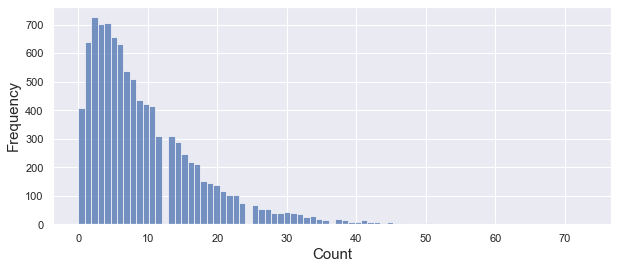

In [71]:
sns.set(rc={'figure.figsize':(10,4)});
fig = sns.histplot(x='count' , data=agg_json_df);
plt.xlabel('Count', fontsize=15);
plt.ylabel('Frequency', fontsize=15);

We can see that 3 count is the most frequent of the  3-7 counts which is the range of counts with the highest frequent. 

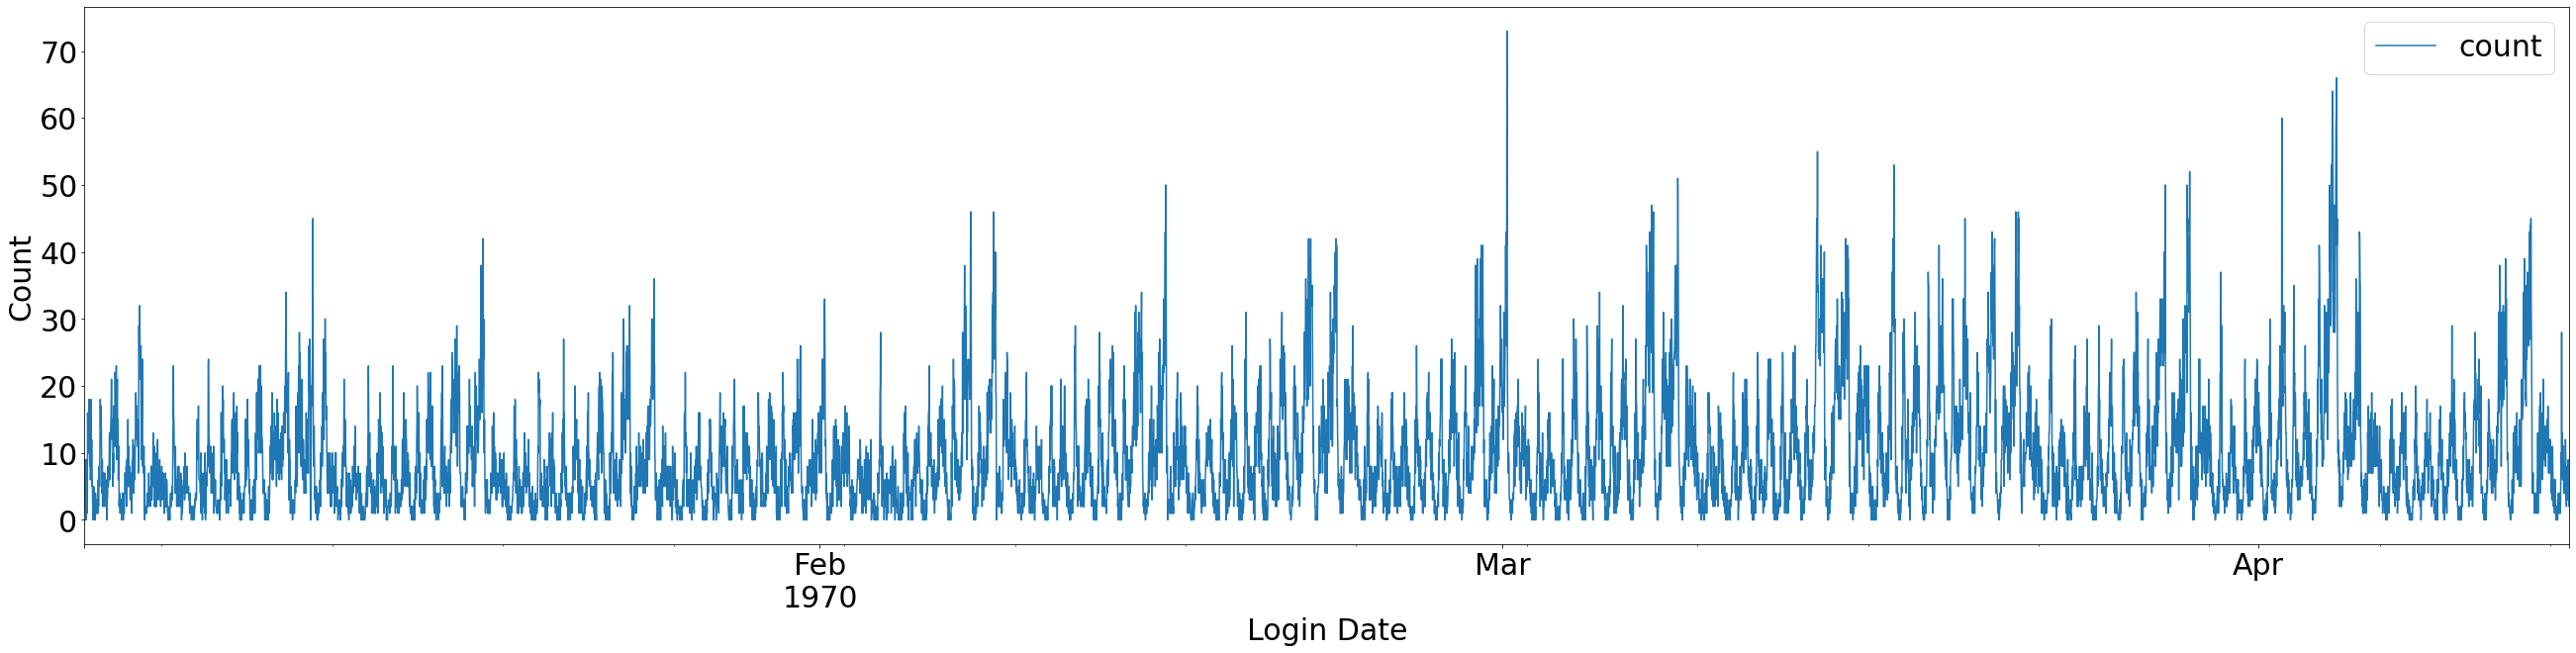

In [56]:
agg_json_df.plot(figsize=(45,10))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Login Date', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.legend(loc='best', fontsize=30)
plt.show()

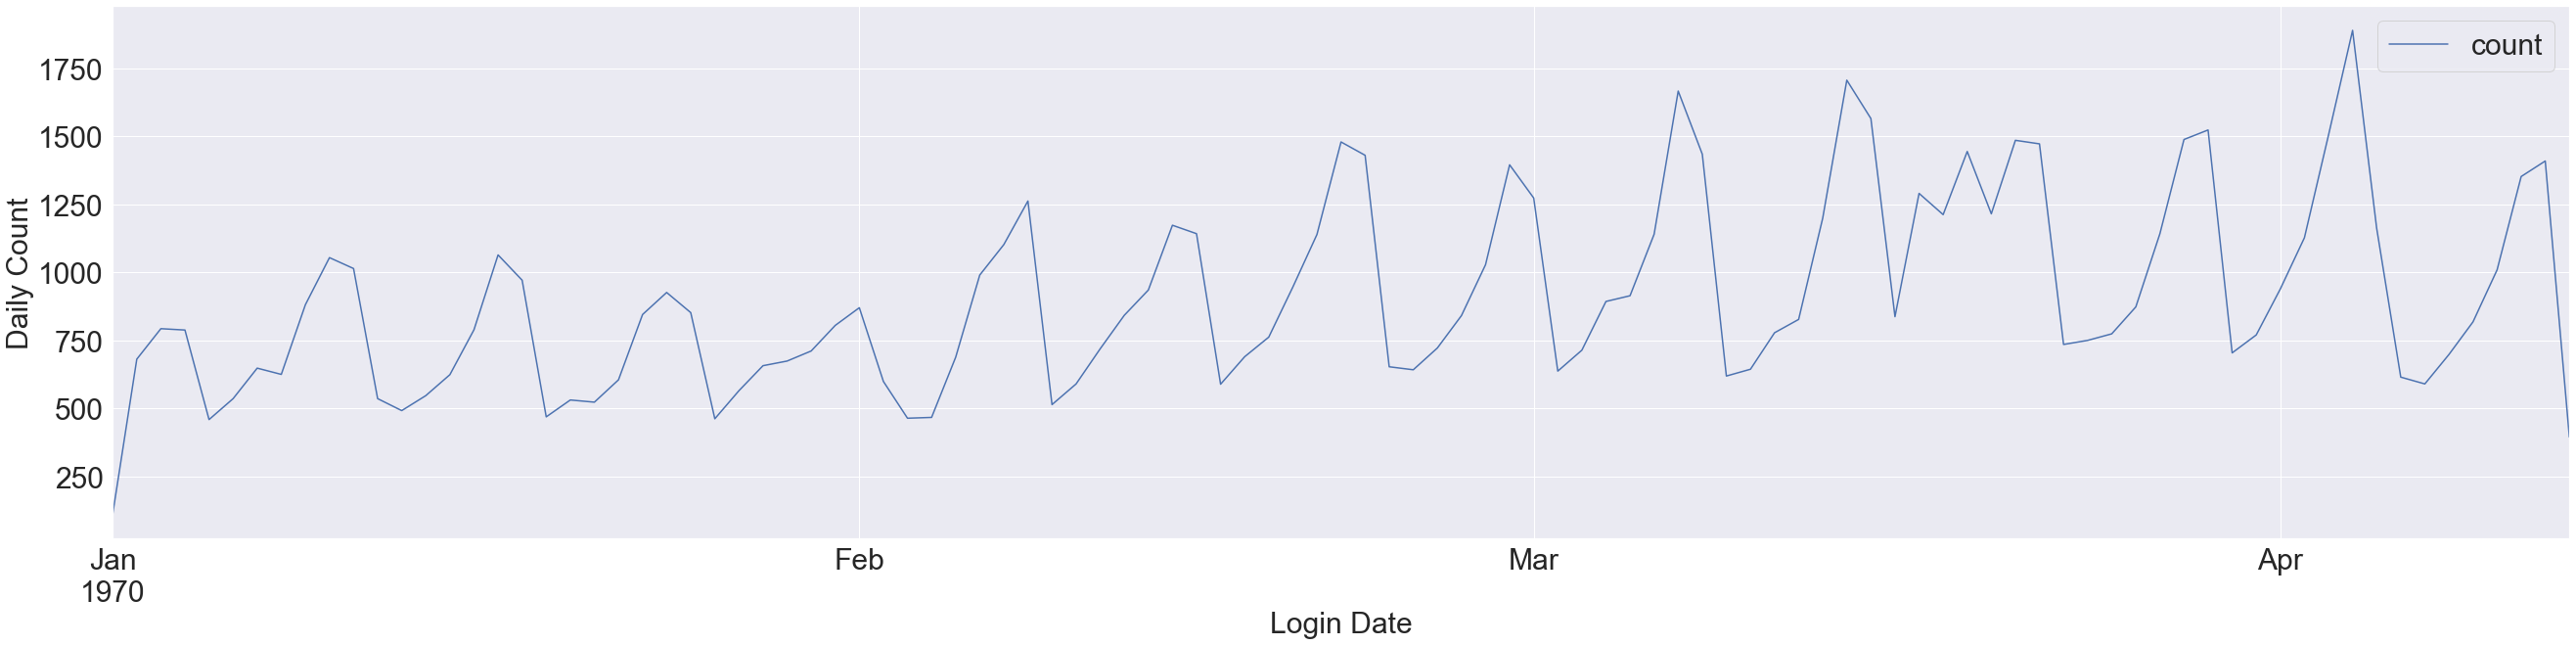

In [123]:
daily.plot(figsize=(45,10))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Login Date', fontsize=30)
plt.ylabel('Daily Count', fontsize=30)
plt.legend(loc='best', fontsize=30)
plt.show()

In [124]:
agg_json_df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


February 1st, 1970 was on Sunday, and we can see demand tends to increase on weekends which we can see with the two highest peaks that occur in regular patterns which is on weekends.

In [125]:
agg_json_df['Jan 1970'].shape

(2896, 1)

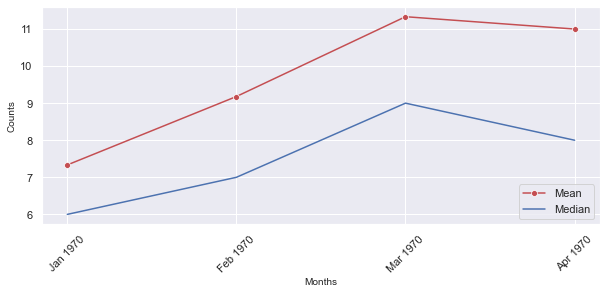

In [126]:
months = ['Jan 1970','Feb 1970','Mar 1970','Apr 1970']
mn = {}
mian = {}
tssum = {}

for m in months:
    ALLmean = agg_json_df[m].mean()
    ALLmedian = agg_json_df[m].median()
    ALLtssum = agg_json_df[m].sum()
    
    mn[m] = ALLmean
    mian[m] = ALLmedian 
    tssum[m] = ALLtssum
    
ALLmedian = pd.DataFrame(mian).T
ALLmean = pd.DataFrame(mn).T
ALLtssum = pd.DataFrame(tssum).T

mn = sns.lineplot(data=ALLmean, palette = ['r'],legend =False,markers=True)
mn = sns.lineplot(data=ALLmedian,legend=False)

mn.set_xlabel("Months", fontsize = 10)
mn.set_ylabel("Counts", fontsize = 10);
plt.legend(loc='lower right', labels=['Mean', 'Median'])
plt.xticks(rotation=45);

There is an upward trend in our data and we can't make much of April data since what we have doesn't cover the whole month of April.